# Data set from Kaggle 
https://www.kaggle.com/lava18/google-play-store-apps/downloads/google-play-store-apps.zip/6

# Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.
Content
Each app (row) has values for catergory, rating, size, and more.

1. App: Application name
2. Category: Category the app belongs to
3. Rating: Overall user rating of the app (as when scraped)
4. Reviews: Number of user reviews for the app (as when scraped)
5. Size: Size of the app (as when scraped)
6. Installs: Number of user downloads/installs for the app (as when scraped)
7. Type: Paid or Free
8. Price: Price of the app (as when scraped)
9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
10.Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
11. Last Updated: Date when the app was last updated on Play Store (as when scraped)
12. Current Ver: Current version of the app available on Play Store (as when scraped)
13. Android Ver: Min required Android version (as when scraped)

In [321]:
import math
import pdb
import pandas as pd
import numpy as np
import datetime
import re
import seaborn as sns
from scipy import stats
from scipy.stats import t, sem
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [322]:
# Hide deprecated warnings
import warnings
warnings.filterwarnings('ignore')

In [323]:
# data 1 and data 2 were merged (inner join) 
#so that only the apps that had reviews lie in the dataset

In [324]:
# Load data from the folder where I uploaded the csv file
data_merged=pd.read_csv("/Users/AirMorena/Desktop/final_proj/csv/data_merged.csv")

In [325]:
print("Shape of data (samples, features): ",data_merged.shape)

Shape of data (samples, features):  (122662, 17)


In [326]:
# Get the columns that have any missing value
s_missing_values = data_merged.isnull().sum()
s_missing_values[s_missing_values > 0]

Rating                       40
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
dtype: int64

In [422]:
duplicateRowsDF = data_merged[data_merged.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
                                 App        Category  Rating  Reviews  \
6                Coloring book moana  ART_AND_DESIGN     3.9      967   
12               Coloring book moana  ART_AND_DESIGN     3.9      967   
21               Coloring book moana  ART_AND_DESIGN     3.9      967   
22               Coloring book moana  ART_AND_DESIGN     3.9      967   
24               Coloring book moana  ART_AND_DESIGN     3.9      967   
25               Coloring book moana  ART_AND_DESIGN     3.9      967   
26               Coloring book moana  ART_AND_DESIGN     3.9      967   
28               Coloring book moana  ART_AND_DESIGN     3.9      967   
29               Coloring book moana  ART_AND_DESIGN     3.9      967   
30               Coloring book moana  ART_AND_DESIGN     3.9      967   
31               Coloring book moana  ART_AND_DESIGN     3.9      967   
32               Coloring book moana  ART_AND_DESIGN     3

In [418]:
data_merged['Translated_Review'].sort_values()

120782    !!!Dont waste time! Failed Samsung flagship ph...
3820                   "...Future Follow updated follow"...
3780                   "...Future Follow updated follow"...
6216      "Cisco Spark stopped working" error group work...
47518     "Classic" allows untimed play; game holds posi...
47298     "Classic" allows untimed play; game holds posi...
47338     "Classic" allows untimed play; game holds posi...
47438     "Classic" allows untimed play; game holds posi...
48098     "Classic" allows untimed play; game holds posi...
47998     "Classic" allows untimed play; game holds posi...
47958     "Classic" allows untimed play; game holds posi...
47878     "Classic" allows untimed play; game holds posi...
47778     "Classic" allows untimed play; game holds posi...
47738     "Classic" allows untimed play; game holds posi...
47658     "Classic" allows untimed play; game holds posi...
47558     "Classic" allows untimed play; game holds posi...
5954      "Coming soon". You link new Go

In [427]:
data_merged.loc[47298]

App                                                            Block Puzzle
Category                                                               GAME
Rating                                                                  4.6
Reviews                                                               59800
Size                                                                    7.8
Installs                                                            5000000
Type                                                                   Free
Price                                                                     0
Content Rating                                                     Everyone
Genres                                                               Puzzle
Last Updated                                                  March 6, 2018
Current Ver                                                             2.9
Android Ver                                                      2.3 and up
Translated_R

In [428]:
data_merged.loc[47998] 

App                                                            Block Puzzle
Category                                                               GAME
Rating                                                                  4.6
Reviews                                                               59907
Size                                                                    7.8
Installs                                                            5000000
Type                                                                   Free
Price                                                                     0
Content Rating                                                     Everyone
Genres                                                               Puzzle
Last Updated                                                  March 6, 2018
Current Ver                                                             2.9
Android Ver                                                      2.3 and up
Translated_R

In [436]:
data_merged2=data_merged.drop_duplicates(subset=['App','Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver',
 'Translated_Review',
 'Sentiment',
 'Sentiment_Polarity',
 'Sentiment_Subjectivity'])

In [437]:
data_merged2.shape

(41661, 18)

In [328]:
data_merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [329]:
print("Data Types: \n", data_merged.dtypes.value_counts())

Data Types: 
 object     13
float64     3
int64       1
dtype: int64


In [330]:
# unique apps in data_merged.
data_merged['App'].unique()

array(['Coloring book moana', 'Garden Coloring Book',
       '3D Color Pixel by Number - Sandbox Art Coloring', ...,
       'Diary with lock password', 'Avakin Life - 3D virtual world',
       'A+ Gallery - Photos & Videos'], dtype=object)

In [331]:
len(data_merged['App'].unique())

1020

In [332]:
#Returns the column names.
data_merged.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [333]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 17 columns):
App                       122662 non-null object
Category                  122662 non-null object
Rating                    122622 non-null float64
Reviews                   122662 non-null int64
Size                      122662 non-null object
Installs                  122662 non-null object
Type                      122662 non-null object
Price                     122662 non-null object
Content Rating            122662 non-null object
Genres                    122662 non-null object
Last Updated              122662 non-null object
Current Ver               122662 non-null object
Android Ver               122662 non-null object
Translated_Review         72605 non-null object
Sentiment                 72615 non-null object
Sentiment_Polarity        72615 non-null float64
Sentiment_Subjectivity    72615 non-null float64
dtypes: float64(3), int64(1), object(13)
memory usage: 15.

In [334]:
data_merged.isnull().sum()

App                           0
Category                      0
Rating                       40
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
dtype: int64

In [335]:
# we need to convert selected variables from object to float or int

In [336]:
# store a copy of merged:
data_merged1 = data_merged.copy()

In [337]:
##############################################################################################

In [338]:
# DATA CLEANING

In [339]:
# 1) convert features that are object that should be numeric into int or float

In [340]:
# Installs

In [341]:
# Feature Installs should be interger, need to remove the + and coma

In [342]:
data_merged['Installs'].unique()

array(['500,000+', '1,000,000+', '100,000+', '5,000,000+', '10,000+',
       '10,000,000+', '100,000,000+', '1,000,000,000+', '50,000,000+',
       '500,000,000+', '1,000+', '50,000+', '5,000+'], dtype=object)

In [343]:
# convert installs to numeric int: replace+ by '', but it leaves a coma
#data_merged['Installs'].str.replace('+','')

In [344]:
# replace comma by nothing and convert to int,and save it into data_merged['Installs'] 
data_merged['Installs']=data_merged['Installs'].str.replace('+','').str.replace(',','').c

In [345]:
# check if it worked
data_merged['Installs'].unique()

array([    500000,    1000000,     100000,    5000000,      10000,
         10000000,  100000000, 1000000000,   50000000,  500000000,
             1000,      50000,       5000])

In [346]:
####Feature Size

In [347]:
data_merged['Size'].unique()

array(['14M', '33M', '37M', '39M', '12M', '25M', '6.1M', '11M',
       'Varies with device', '15M', '24M', '17M', '2.4M', '27M', '16M',
       '2.9M', '38M', '21M', '52M', '8.2M', '4.2M', '2.8M', '5.0M',
       '5.9M', '19M', '73M', '6.8M', '4.0M', '10M', '2.1M', '42M', '30M',
       '29M', '3.9M', '18M', '3.2M', '20M', '26M', '48M', '22M', '8.5M',
       '28M', '46M', '23M', '7.1M', '40M', '7.8M', '6.6M', '5.1M', '79k',
       '32M', '2.2M', '4.7M', '2.7M', '13M', '118k', '44M', '7.3M',
       '695k', '6.2M', '56M', '3.1M', '31M', '8.0M', '7.9M', '1.4M',
       '7.2M', '3.8M', '41M', '9.0M', '4.9M', '8.1M', '3.7M', '4.5M',
       '2.6M', '6.9M', '7.4M', '1.9M', '1.8M', '2.3M', '5.2M', '1.2M',
       '59M', '5.6M', '72M', '9.6M', '43M', '3.6M', '9.5M', '8.9M', '65M',
       '79M', '8.4M', '58M', '50M', '45M', '53M', '68M', '66M', '35M',
       '76M', '9.4M', '4.3M', '67M', '60M', '5.5M', '3.3M', '7.5M',
       '9.1M', '8.3M', '9.2M', '7.0M', '77M', '5.7M', '5.3M', '232k',
       '99M',

# to clean size we can use a for loop
## for loop to iterate over Size:

# create a new empty list:
my_new_size=[]

# create a list from series data['Size']
sizelist=data_merged['Size'].tolist()
                     
for size in sizelist:# size element in the list
       
        if size=='Varies with device':
            my_new_size.append(size)
            
        else:
            print(size)
            print(size[1:0])
            unit=size[-1]# the last character of the string is -1
            value=float(size[:-1])#change the value to float for all except last character

            if unit=='M':
                    new_value=value*1000000
                    my_new_size.append(new_value)
            elif unit=='k':
                    new_value=value/1000
                    my_new_size.append(new_value)

In [348]:
# another way

In [349]:
data_merged['Size'] = data_merged['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data_merged['Size'] = data_merged['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data_merged['Size'] = data_merged['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data_merged['Size'] = data_merged['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data_merged['Size'] = data_merged['Size'].apply(lambda x: float(x))
data_merged['Size'].dtypes

dtype('float64')

In [350]:
# in order to know how to replace the NaN
# we need to look at the distribution of the non nulls to decide how to deal
# with the nan, replace by zero or by the mean/median?

In [351]:
data_merged['Size'].describe()
# mean 34.68 and median 25

count    75432.000000
mean        34.687861
std         27.449311
min          0.008500
25%         11.000000
50%         25.000000
75%         53.000000
max         99.000000
Name: Size, dtype: float64

In [352]:
#select those rows that have a null value in the column Size
isnull_condition = (data_merged['Size'].isnull())

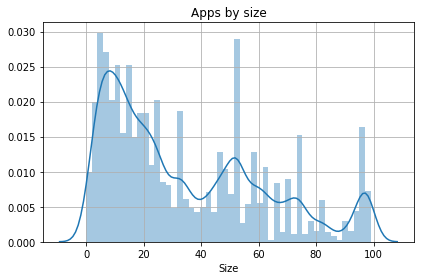

In [353]:
non_null_rating = data_merged[~isnull_condition]['Size']
#vizualisation distribution of NON NULLs of Size values
_=sns.distplot(non_null_rating)
plt.title("Apps by size")
plt.grid(True)
plt.tight_layout()

In [354]:
# replace nan by mean: create an array with the non null values and apply the mean

In [355]:
size_array = data_merged[data_merged['Size']!=np.nan]['Size']

In [356]:
data_merged['Size'].replace(np.nan,size_array.mean())

0         14.000000
1         14.000000
2         14.000000
3         14.000000
4         14.000000
5         14.000000
6         14.000000
7         14.000000
8         14.000000
9         14.000000
10        14.000000
11        14.000000
12        14.000000
13        14.000000
14        14.000000
15        14.000000
16        14.000000
17        14.000000
18        14.000000
19        14.000000
20        14.000000
21        14.000000
22        14.000000
23        14.000000
24        14.000000
25        14.000000
26        14.000000
27        14.000000
28        14.000000
29        14.000000
            ...    
122632    34.687861
122633    34.687861
122634    34.687861
122635    34.687861
122636    34.687861
122637    34.687861
122638    34.687861
122639    34.687861
122640    34.687861
122641    34.687861
122642    34.687861
122643    34.687861
122644    34.687861
122645    34.687861
122646    34.687861
122647    34.687861
122648    34.687861
122649    34.687861
122650    34.687861


In [357]:
data_merged['Size']= data_merged['Size'].replace(np.nan,size_array.mean())

In [358]:
# new size uniques (numeric, and no nans: 
data_merged['Size'].unique()

array([1.40000000e+01, 3.30000000e+01, 3.70000000e+01, 3.90000000e+01,
       1.20000000e+01, 2.50000000e+01, 6.10000000e+00, 1.10000000e+01,
       3.46878609e+01, 1.50000000e+01, 2.40000000e+01, 1.70000000e+01,
       2.40000000e+00, 2.70000000e+01, 1.60000000e+01, 2.90000000e+00,
       3.80000000e+01, 2.10000000e+01, 5.20000000e+01, 8.20000000e+00,
       4.20000000e+00, 2.80000000e+00, 5.00000000e+00, 5.90000000e+00,
       1.90000000e+01, 7.30000000e+01, 6.80000000e+00, 4.00000000e+00,
       1.00000000e+01, 2.10000000e+00, 4.20000000e+01, 3.00000000e+01,
       2.90000000e+01, 3.90000000e+00, 1.80000000e+01, 3.20000000e+00,
       2.00000000e+01, 2.60000000e+01, 4.80000000e+01, 2.20000000e+01,
       8.50000000e+00, 2.80000000e+01, 4.60000000e+01, 2.30000000e+01,
       7.10000000e+00, 4.00000000e+01, 7.80000000e+00, 6.60000000e+00,
       5.10000000e+00, 7.90000000e-02, 3.20000000e+01, 2.20000000e+00,
       4.70000000e+00, 2.70000000e+00, 1.30000000e+01, 1.18000000e-01,
      

In [359]:
# new size describe without the nan (mean previously was # mean 34.68 and median 25)
data_merged['Size'].describe()
# wo the nan , the mean is 34 and median 34

count    122662.000000
mean         34.687861
std          21.525494
min           0.008500
25%          19.000000
50%          34.687861
75%          35.000000
max          99.000000
Name: Size, dtype: float64

In [360]:
##### Feature Price 

In [361]:
#Price is store as an object
#data_merged['Price'].dtypes

In [362]:
data_merged['Price'].unique()

array(['0', '$6.99', 0, '$1.99', '$4.99', '$3.99', '$2.99', '$11.99',
       '$9.99', '$7.99', '$33.99', '$3.95', '$29.99', '$2.49', '$0.99'],
      dtype=object)

In [363]:
# remove dollar from Price and store it in Price2
data_merged['Price']= data_merged['Price'].str.replace("$","")

In [364]:
data_merged['Price'].unique()

array(['0', '6.99', nan, '1.99', '4.99', '3.99', '2.99', '11.99', '9.99',
       '7.99', '33.99', '3.95', '29.99', '2.49', '0.99'], dtype=object)

In [400]:
data_merged['Price'].isna().sum()

32768

In [365]:
# in order to know how to replace the NaN
# we need to look at the distribution of the non nulls to decide how to deal
# with the nan, replace by zero or by the mean/median?

In [366]:
data_merged['Price'] = data_merged['Price'].astype(float)

In [367]:
# visualise non nulls in a graph to decide 
#select those rows that have a null value in the column Size
isnull_condition = (data_merged['Price'].isna())

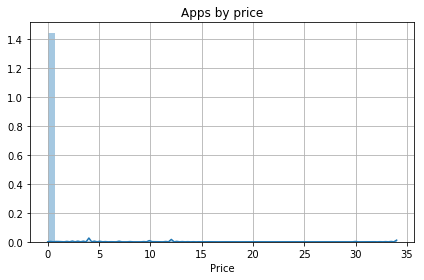

In [368]:
non_null_rating = data_merged[~isnull_condition]['Price']
#vizualisation distribution of NON NULLs of Size values
_=sns.distplot(non_null_rating)
plt.title("Apps by price")
plt.grid(True)
plt.tight_layout()

In [369]:
# most apps are free so , change nan to zero
####

In [401]:
# store it into Price
data_merged['Price']=data_merged['Price'].fillna(0)

In [404]:
data_merged['Price'].isna().sum()

0

In [402]:
data_merged['Price'].dtypes

dtype('float64')

In [403]:
data_merged['Price'].describe()

count    122662.000000
mean          0.128265
std           1.563680
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          33.990000
Name: Price, dtype: float64

In [373]:
###### Feature reviews: means numbr of reviews per app

In [374]:
# Reviews
data_merged['Reviews'].unique()

array([    967,     974,   13791, ...,  179139, 1275373,  223941])

In [375]:
len(data_merged['Reviews'].unique())

1330

In [376]:
data_merged['Reviews'].dtypes

dtype('int64')

In [377]:
data_merged['Reviews'].describe()

count    1.226620e+05
mean     2.243249e+06
std      6.324819e+06
min      1.000000e+01
25%      2.752400e+04
50%      1.598720e+05
75%      1.500999e+06
max      7.815831e+07
Name: Reviews, dtype: float64

In [378]:
print("range number of reviews: ", data_merged['Reviews'].min(),"-",data_merged['Reviews'].max())

range number of reviews:  10 - 78158306


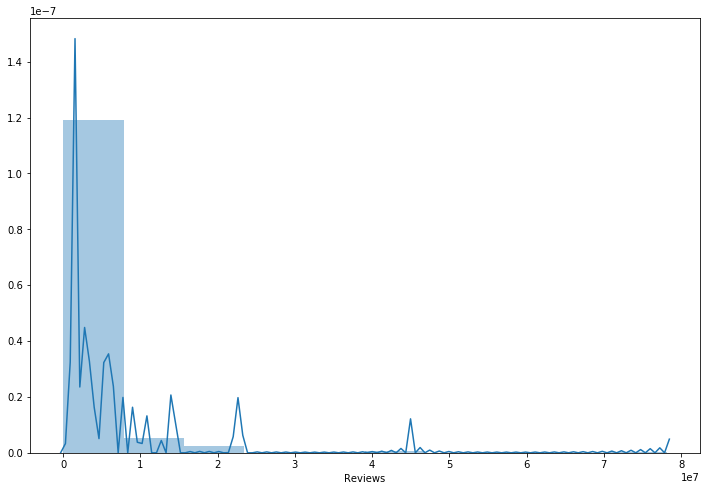

In [379]:
_=plt.figure(figsize=(12,8))
sns.distplot(data_merged['Reviews'], bins=10 )

Text(0.5, 1.0, 'Number of reviews')

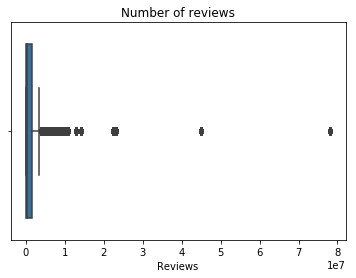

In [380]:
#vizualisation distribution of number of reviews values
_=sns.boxplot(data_merged['Reviews'])
plt.title("Number of reviews")

In [381]:
# vizualise, once apply log to reviews

In [382]:
def transform_continuous_to_logarithmic_scale(series):
  # Transform to logarithmic scale
  return np.log(series)

In [383]:
data_merged['Reviewslog']=transform_continuous_to_logarithmic_scale(data_merged['Reviews'])

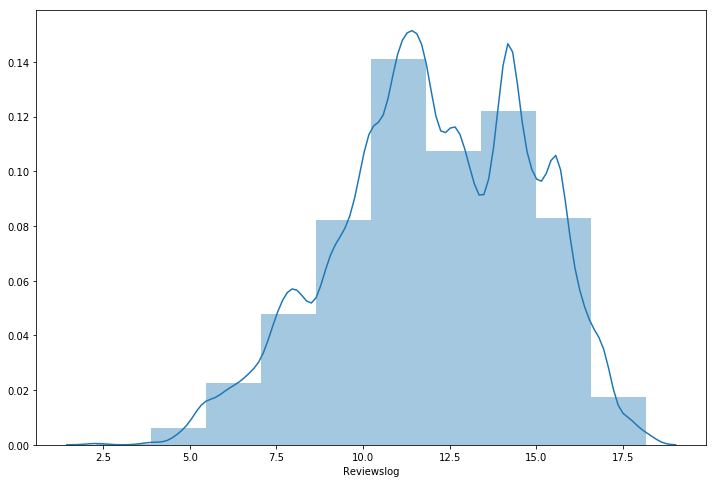

In [384]:
_=plt.figure(figsize=(12,8))
sns.distplot(data_merged['Reviewslog'], bins=10 )

In [385]:
#### Feature Rating: has 40 missing values

In [386]:
# Feature Rating: already a float , range should be within 0 to 5
# already a float , range should be within 0 to 5

In [387]:
print("range:", data_merged['Rating'].min(),"-",data_merged['Rating'].max())

range: 2.5 - 4.9


In [388]:
print(data_merged['Rating'].isna().sum(),"missing values out of", len(data_merged['Rating']))

40 missing values out of 122662


In [389]:
data_merged['Rating'].describe()

count    122622.000000
mean          4.322405
std           0.284766
min           2.500000
25%           4.200000
50%           4.400000
75%           4.500000
max           4.900000
Name: Rating, dtype: float64

In [390]:
#select those rows that have a null value in the column share
isnull_condition = (data_merged['Rating'].isnull())

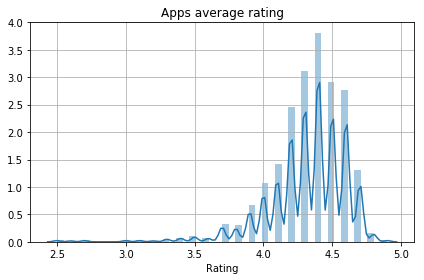

In [391]:
non_null_rating = data_merged[~isnull_condition]['Rating']
#vizualisation distribution 0 of share values
_=sns.distplot(non_null_rating)
plt.title("Apps average rating")
plt.grid(True)
plt.tight_layout()

In [392]:
rating_array = data_merged[data_merged['Rating']!=np.nan]['Rating']

In [393]:
# replace 40 nan with mean rating
data_merged['Rating'].replace(np.nan,rating_array.mean())

0         3.9
1         3.9
2         3.9
3         3.9
4         3.9
5         3.9
6         3.9
7         3.9
8         3.9
9         3.9
10        3.9
11        3.9
12        3.9
13        3.9
14        3.9
15        3.9
16        3.9
17        3.9
18        3.9
19        3.9
20        3.9
21        3.9
22        3.9
23        3.9
24        3.9
25        3.9
26        3.9
27        3.9
28        3.9
29        3.9
         ... 
122632    4.5
122633    4.5
122634    4.5
122635    4.5
122636    4.5
122637    4.5
122638    4.5
122639    4.5
122640    4.5
122641    4.5
122642    4.5
122643    4.5
122644    4.5
122645    4.5
122646    4.5
122647    4.5
122648    4.5
122649    4.5
122650    4.5
122651    4.5
122652    4.5
122653    4.5
122654    4.5
122655    4.5
122656    4.5
122657    4.5
122658    4.5
122659    4.5
122660    4.5
122661    4.5
Name: Rating, Length: 122662, dtype: float64

In [394]:
data_merged['Rating']= data_merged['Rating'].replace(np.nan,rating_array.mean())

In [395]:
data_merged['Rating'].unique()

array([3.9       , 4.4       , 4.3       , 4.1       , 4.7       ,
       4.5       , 4.2       , 4.9       , 4.6       , 4.        ,
       4.8       , 3.4       , 3.5       , 3.8       , 3.2       ,
       3.7       , 2.6       , 3.3       , 3.        , 2.5       ,
       3.6       , 3.1       , 4.32240463, 2.7       ])

Text(0.5, 1.0, 'Apps by rating')

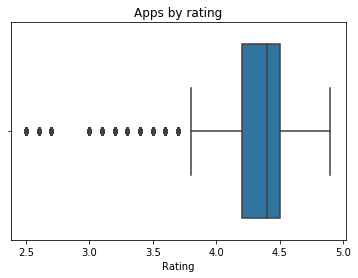

In [396]:
#vizualisation distribution of new ['Rating'] values
_=sns.boxplot(data_merged['Rating'])
plt.title("Apps by rating")

In [397]:
#### Feature Last Updated

In [398]:
data_merged['Last Updated'].unique()

array(['January 15, 2018', 'September 20, 2017', 'August 3, 2018',
       'March 20, 2018', 'October 11, 2017', 'March 21, 2018',
       'July 19, 2018', 'January 6, 2018', 'July 14, 2018',
       'July 20, 2018', 'July 31, 2018', 'July 3, 2018', 'June 12, 2018',
       'July 11, 2018', 'March 27, 2018', 'August 4, 2018',
       'July 29, 2018', 'August 2, 2018', 'July 12, 2018',
       'February 28, 2018', 'July 25, 2018', 'May 10, 2018',
       'August 3, 2017', 'May 24, 2018', 'May 14, 2018', 'March 1, 2017',
       'July 27, 2018', 'July 17, 2015', 'May 18, 2018', 'June 28, 2018',
       'January 21, 2018', 'August 1, 2018', 'May 27, 2018',
       'June 25, 2018', 'November 23, 2017', 'August 28, 2017',
       'August 20, 2016', 'July 28, 2018', 'February 15, 2018',
       'July 17, 2018', 'April 2, 2018', 'July 24, 2018', 'July 8, 2018',
       'June 26, 2018', 'August 6, 2018', 'June 21, 2018',
       'July 26, 2018', 'June 8, 2018', 'July 30, 2018', 'April 18, 2018',
       'Feb

In [302]:
#### Feature current version: I will deal with this later#####################

In [438]:
#
data_merged['Current Ver'].unique()

array(['2.0.0', '2.9.2', '1.2.3', '2.2.5', '1.1', '1.0.8', '1.03', '2.20',
       '1.1.0', 'Varies with device', '2.0.1', '1.6.1', '1.7', '1.37',
       '1.6', '1.0.3', '1.0.6', '1.9', '1.0.2.0', '2.1', '1.0', '2.0.075',
       '1.911805270', '2.3.18', '5.0.6', '2.0', '6.0.8', '9.00.950462',
       '3.05', '2.5.3', '7.0.4.6', '1.15', '3.1.7.9', '3.9.1', '3.4.2',
       '2.19.0.204537701', '3.3', '3.550.2', '1.1.13', '5.86',
       '99.0.0.35.75', '3.9.2', '1.12.0', '1.7.14', '3.19.005', '6.1.2',
       '6.4.4', '3.7.5', '2.6.158', '5.20.7', '11.1.0', '3.0.4651',
       '3.3.0', '2.22.397', '3.1.0', '1.7.7', '1.01', '2.8.4.201036949',
       '1.3.4', '24.6.6', '3.2.0.100171', '5.2', '69.0.3497.24',
       '37.1.206017801.DR37_RC14', '0.1.100944346', '3.0.4', '7.73',
       '5.65.0', '5.22.18.0006', '1.4.1.0', '6.4.0.4', '5.85.1', '196',
       '3.5.0', '8.1.2-6310', '1.286', '2.17.3', '5.28.0', '1.9.4.74',
       '5.0.9', '2.8', '1.1.6', '2.5.2', '6.1.3', '4.17.2', '3.5.0.1',
       '4.

In [304]:
#newcurrentver=newcurrentver.apply(lambda x: 'Varies with device' if x=='Varies with device'  else  re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0] )

In [306]:
#newcurrentver.replace(np.nan,'Varies with device')

In [ ]:
# extract month an year ?

In [183]:
# Feature 'Translated_Review'
data_merged['Translated_Review'].unique()

array(["A kid's excessive ads. The types ads allowed app, let alone kids",
       'It bad >:(', 'like', ...,
       'Recommended, 100% love it, keep good work dev :) :*',
       'Just allow time ...', "It's good best gallery phone"],
      dtype=object)

In [184]:
len(data_merged['Translated_Review'].unique())

26683

In [ ]:
##### export clean data into csv

In [405]:
# before saving new csv double check data types for all
data_merged.info()
data_merged.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 18 columns):
App                       122662 non-null object
Category                  122662 non-null object
Rating                    122662 non-null float64
Reviews                   122662 non-null int64
Size                      122662 non-null float64
Installs                  122662 non-null int64
Type                      122662 non-null object
Price                     122662 non-null float64
Content Rating            122662 non-null object
Genres                    122662 non-null object
Last Updated              122662 non-null object
Current Ver               122662 non-null object
Android Ver               122662 non-null object
Translated_Review         72605 non-null object
Sentiment                 72615 non-null object
Sentiment_Polarity        72615 non-null float64
Sentiment_Subjectivity    72615 non-null float64
Reviewslog                122662 non-null float64
dtypes:

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
Reviewslog                    0
dtype: int64

In [ ]:
# export data_clean
# Export data to my chosen folder
#data_merged.to_csv("/Users/AirMorena/Desktop/final_proj/csv/data_clean.csv", index=False, encoding='utf-8')